# Pattern matching analysis
### Author: Krzysztof Chmielewski
In this section i will compare few pattern finding algorithms. We need to import those algorithms from `utils` directory and also import suffix structures.

In [1]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.naive_pattern_matching import naive_pattern_match
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [2]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [3]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Naive algorithm time exec and mem usage
    start_time = time.time()
    naive_result, naive_compares = naive_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_naive = get_memory_usage()
    naive_time_exec = (end_time - start_time) * 1000
    naive_mem_usage = mem_after_naive - prior_mem

    # Suffix array time exec and mem usage
    sa = SuffixArray(text)
    start_time = time.time()
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - naive_mem_usage

    # Suffix tree time exec and mem usage
    st = SuffixTree(text)
    start_time = time.time()
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    ac = AhoCorasick([pattern])
    start_time = time.time()
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Naive": {
            "execution_time_ms": naive_time_exec,
            "memory_usage_kb": naive_mem_usage,
            "compares": naive_compares,
            "results": naive_result
        },
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [4]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [5]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.096321,0.023127,0.012636,0.042439,0.062466,0.12064,0.080824
memory_usage_kb,0.0,110136.0,0.0,0.0,0.0,0.0,0.0
compares,108,0,4,108,42,0,198
results,[],[],[],[],[],[],[]


# Medium text comparison

In [6]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [7]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,1.078129,0.079155,0.023603,0.614166,0.236988,0.926018,0.430346
memory_usage_kb,0.0,111404.0,128.0,0.0,0.0,0.0,128.0
compares,1058,0,4,1058,358,0,1998
results,[],[],[],[],[],[],[]


# Long text comparison

In [8]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [9]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,5.443335,0.050306,0.027657,1.467943,2.013922,2.614021,1.137972
memory_usage_kb,0.0,161836.0,2816.0,0.0,0.0,0.0,0.0
compares,10597,90,6,10455,3815,72,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [10]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [11]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,42.360544,0.368357,0.420094,14.607191,13.41033,25.708675,12.115955
memory_usage_kb,0.0,4968028.0,28416.0,128.0,0.0,0.0,156.0
compares,105998,1042,6,104356,38504,1026,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [12]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [13]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

### Time execution
First we contain data results in Pandas Series so that i will be more readable and easier to access for plotting, then we are able to plot each algorithm behaviour with given text and pattern of different lengths and see how they compare to each other.

In [14]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100           0.029087   0.036955   0.074625   0.101805   
                   1000          0.130892   0.117302   0.130177   0.138283   
                   10000         1.135588   1.080990   1.615047   1.185417   
                   100000       11.228800  11.183500  10.647297  11.296511   
Boyer-Moore        100           0.036716   0.036478   0.048399   0.056982   
                   1000          0.144482   0.112534   0.057936   0.049591   
                   10000         1.362562   0.943184   0.683784   0.313759   
                   100000       13.389111   8.995771   4.581690   2.883673   
Knuth-Morris-Pratt 100           0.042677   0.032187   0.047684   0.052691   
                   1000          0.236034   0.151157   0.145674   0.150442   
                   10000         1.505852   1.491547   2.276897   1.526594   
                   100000       14.639616  14.657259  14.381647  14.858246   
Naive              100           0.092268   0.054359   0.059366   0.089407   
                   1000          0.697136   0.405312   0.373125   0.374794   
                   10000         3.807306   3.810406   3.983259   4.926920   
                   100000       39.849043  38.403988  38.251400  42.701483   
Rabin-Karp         100           0.048637   0.061989   0.075579   0.090837   
                   1000          0.284433   0.259399   0.254631   0.255585   
                   10000         2.610445   2.552271   3.905773   2.549648   
                   100000       25.782108  25.547028  25.593519  25.506496   
Suffix array       100           0.014305   0.011921   0.015736   0.021458   
                   1000          0.015497   0.013351   0.012398   0.013351   
                   10000         0.031471   0.023603   0.036240   0.027418   
                   100000        0.243187   0.100374   0.055313   0.072718   
Suffix tree        100           0.011206   0.013113   0.020266   0.016689   
                   1000          0.005722   0.006676   0.005960   0.010014   
                   10000         0.020981   0.014305   0.022650   0.020027   
                   100000        0.380516   0.096560   0.032187   0.033379   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100           0.134468  
                   1000          0.184536  
                   10000         1.232386  
                   100000       10.852337  
Boyer-Moore        100           0.041485  
                   1000          0.052452  
                   10000         0.227928  
                   100000        1.849174  
Knuth-Morris-Pratt 100           0.027657  
                   1000          0.159264  
                   10000         1.484394  
                   100000       14.430285  
Naive              100           0.036716  
                   1000          0.391006  
                   10000         4.055262  
                   100000       39.378881  
Rabin-Karp         100           0.068665  
                   1000          0.259638  
                   10000         2.571106  
                   100000       25.570154  
Suffix array       100           0.015497  
                   1000          0.029802  
                   10000         0.030756  
                   100000        0.174522  
Suffix tree        100           0.015497  
                   1000          0.015974  
                   10000         0.021219  
                   100000        0.034332

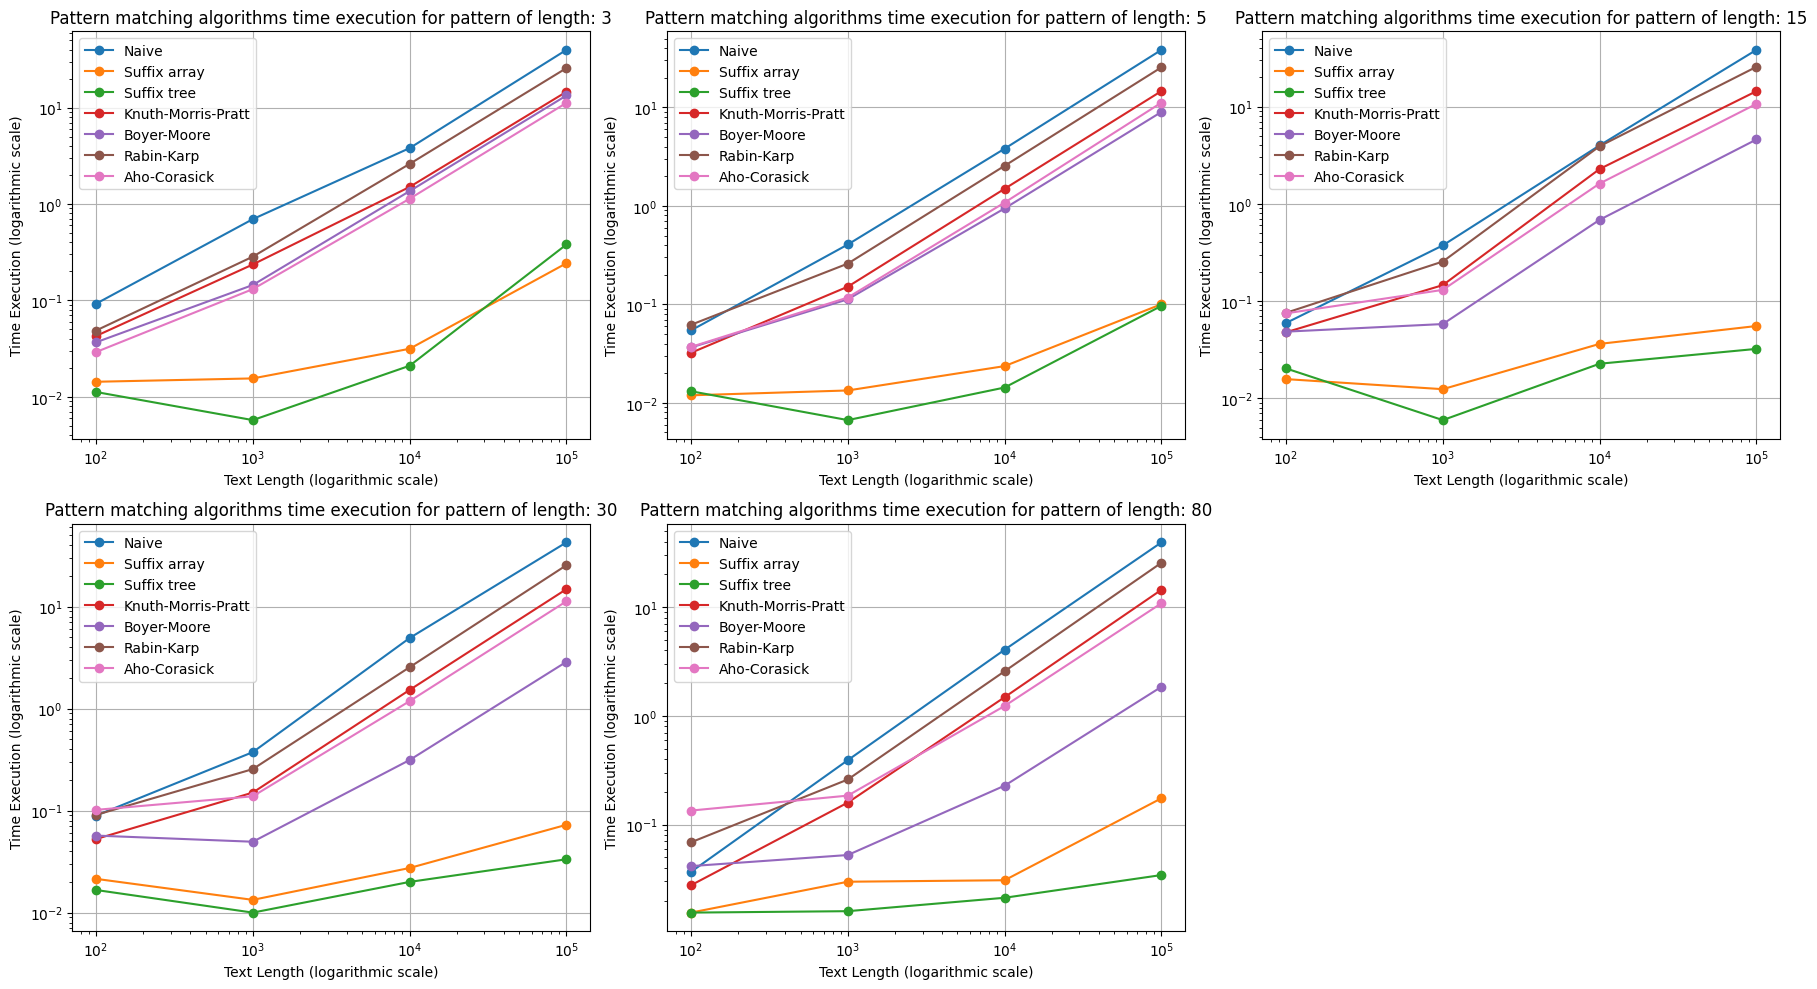

In [15]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage

In [16]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Boyer-Moore        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Knuth-Morris-Pratt 100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Naive              100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Rabin-Karp         100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Suffix array       100          5008996.0  5008996.0  5008996.0  5008996.0   
                   1000         5008996.0  5008996.0  5008996.0  5008996.0   
                   10000        5008996.0  5008996.0  5008996.0  5009892.0   
                   100000       5053796.0  5070180.0  5072100.0  5074020.0   
Suffix tree        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0      640.0        0.0   
                   100000         12288.0        0.0        0.0      128.0   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Boyer-Moore        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Knuth-Morris-Pratt 100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Naive              100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Rabin-Karp         100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Suffix array       100          5008996.0  
                   1000         5008996.0  
                   10000        5009892.0  
                   100000       5070848.0  
Suffix tree        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0

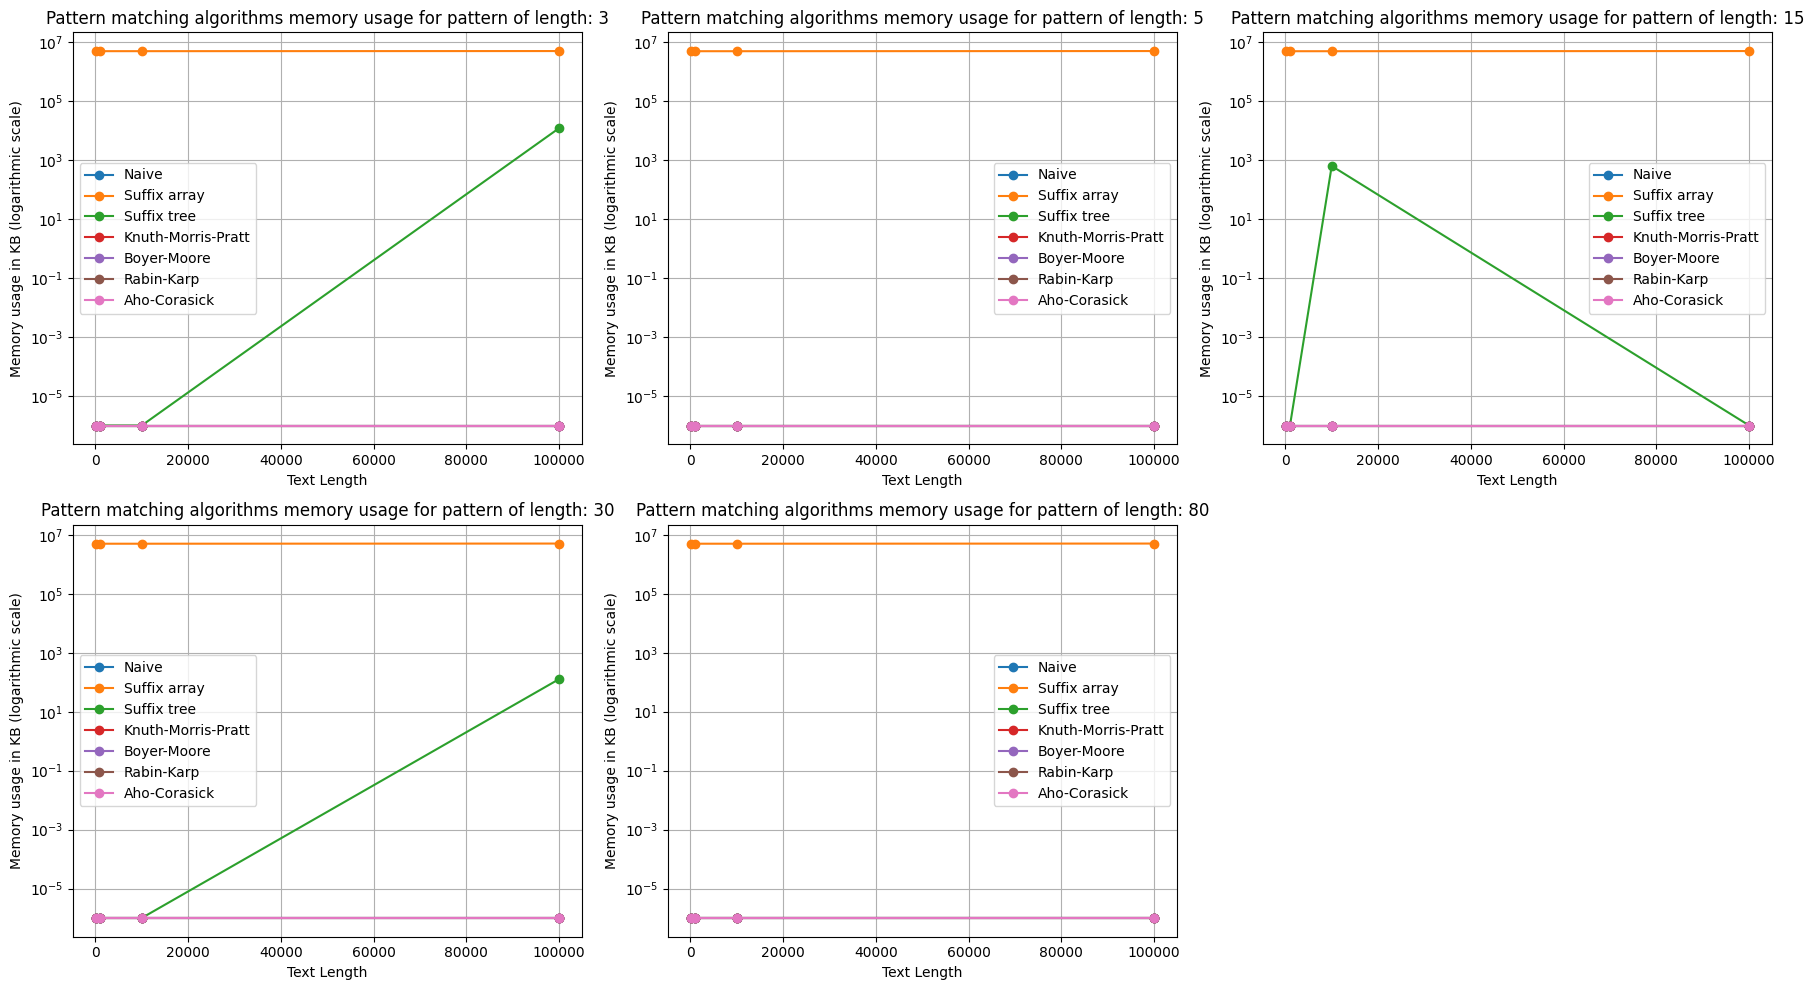

In [17]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Memory usage'].replace(0, 1e-6), marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons

In [18]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Characters comparison'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5       15      30      80
Algorithm          Text Length                                        
Aho-Corasick       100             198     188     185     171     121
                   1000           1998    1996    1986    1967    1894
                   10000         19952   19992   19915   19929   19879
                   100000       199316  199347  199299  198678  198892
Boyer-Moore        100              42      50      53      93     239
                   1000            358     264     164     170     277
                   10000          3815    2399    1167     833     754
                   100000        38504   24284   12490    8229    5958
Knuth-Morris-Pratt 100             108     102     108     102     100
                   1000           1058    1000    1000    1049    1101
                   10000         10455   10000   10685   10012   10430
                   100000       104356  104964  101114  107615  100130
Naive              100             108     110     109     101     103
                   1000           1058    1000    1000    1055    1137
                   10000         10597   10004   10758   10054   10475
                   100000       105998  105613  101801  108934  101159
Rabin-Karp         100               0      15      15      30      80
                   1000              0       5      15      30      80
                   10000            72      10      30      30      80
                   100000         1026     380     150     300     880
Suffix array       100               0      23      29      37      87
                   1000              0      16      25      47     118
                   10000            90      23      85      65     111
                   100000         1042     402     194     336     931
Suffix tree        100               4       7      18      32      83
                   1000              4       6      16      34      85
                   10000             6       6      20      34      85
                   100000            6       9      19      35      84

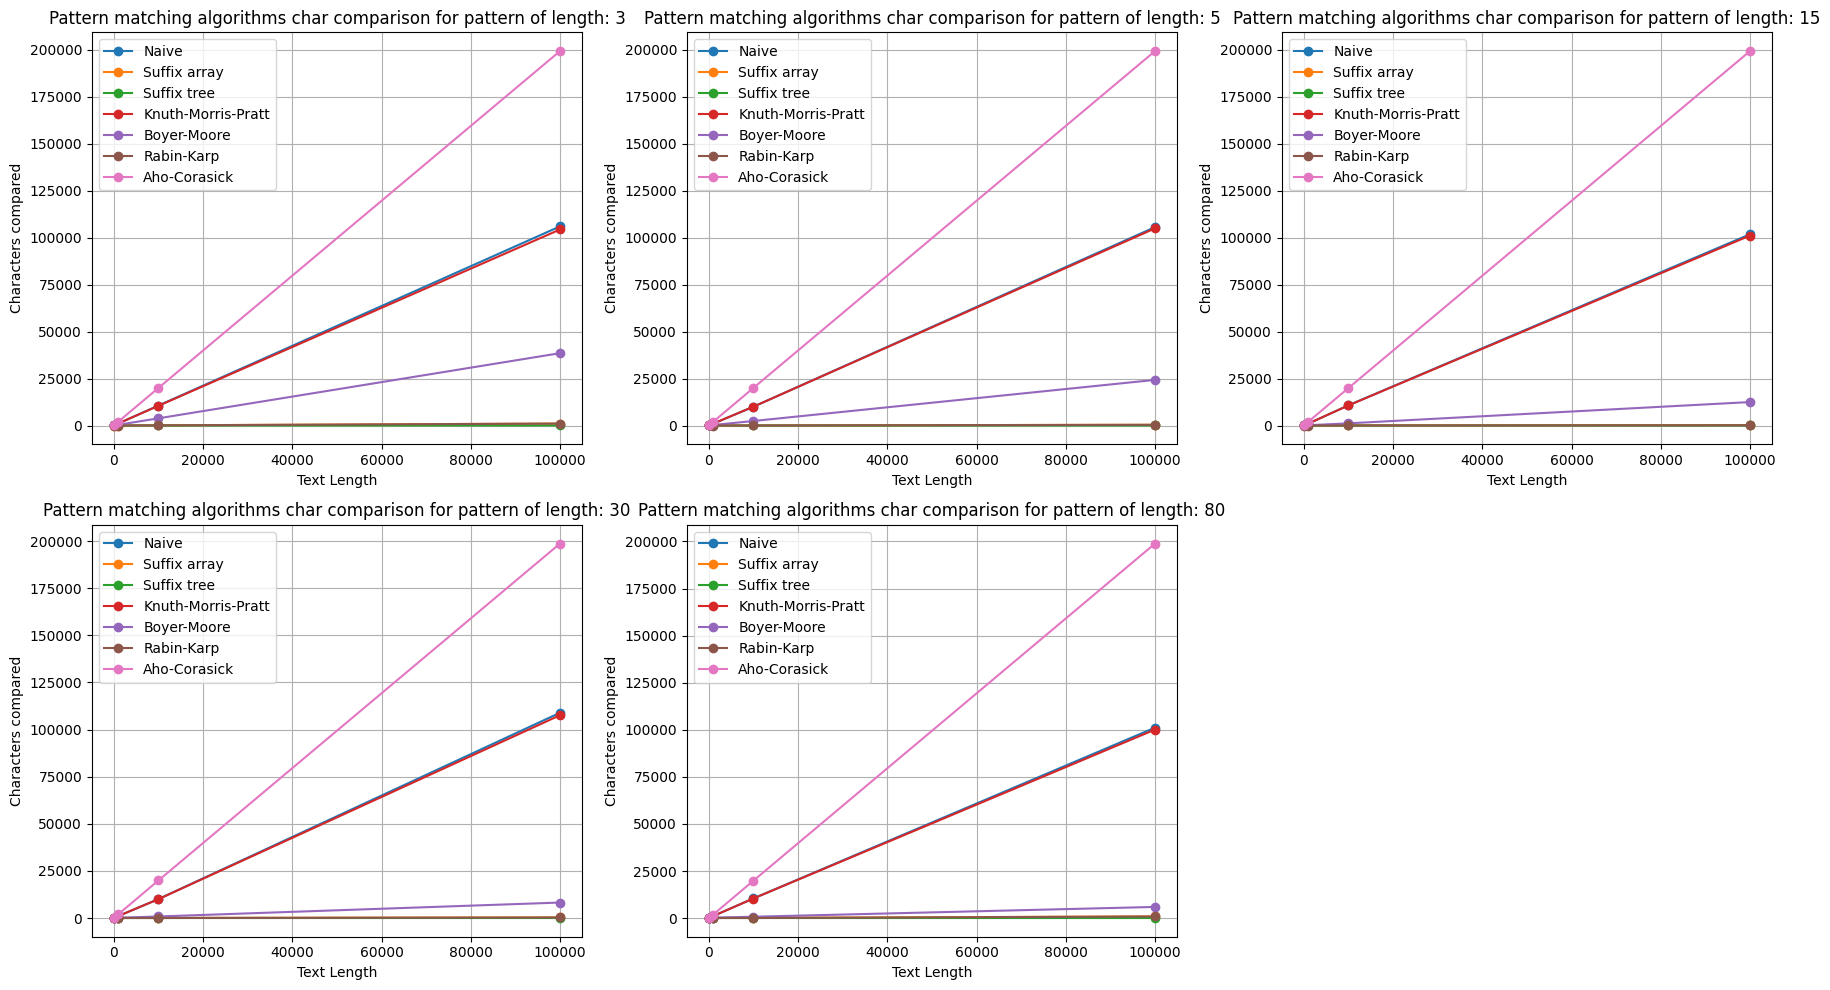

In [19]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

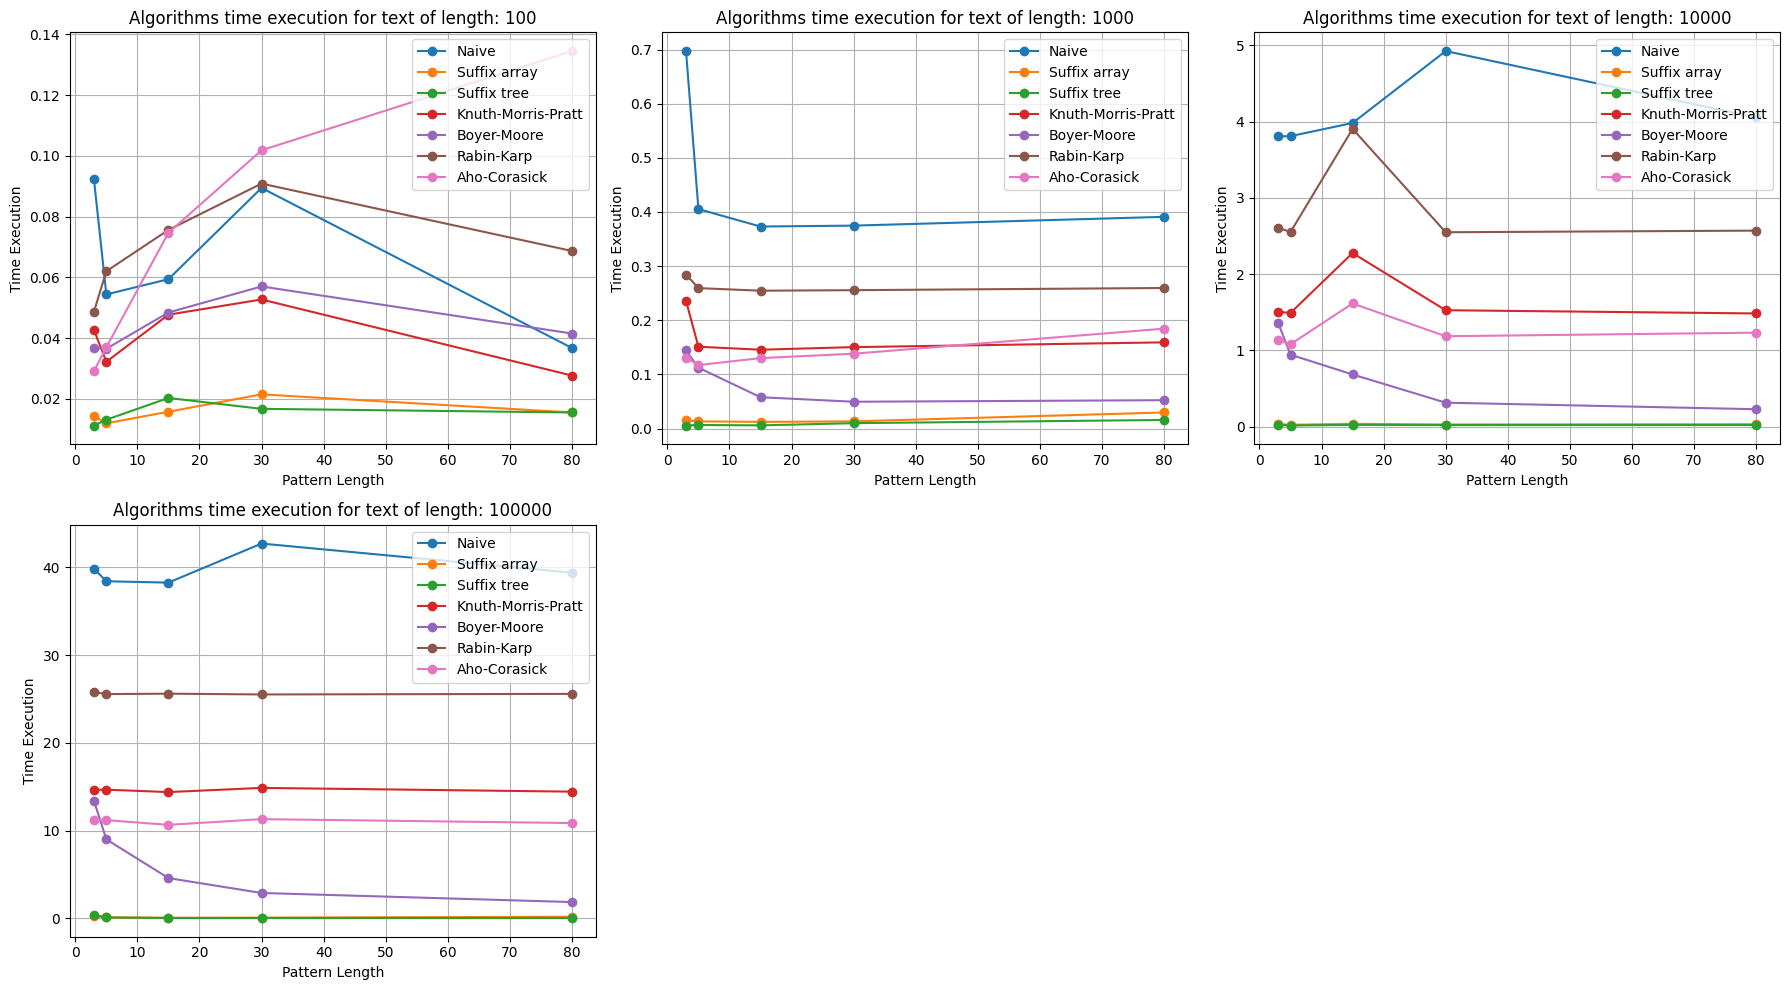

In [20]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()
text_lengths = df_time_reset['Text Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, text_len in enumerate(sorted(text_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Text Length'] == text_len)]
        
        plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Pattern Length')
    plt.ylabel('Time Execution')
    plt.title(f'Algorithms time execution for text of length: {text_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Plotting results with more samples

In [21]:
import random
import numpy as np

def randtext(size: int) -> str:
    return "".join( (chr(ord('a') + random.randint(0,25))) for _ in range(size) )

In [22]:
dtime = dict()
dmem = dict()
dcomp = dict()
sizes_t = np.linspace(10,5e4,10, dtype=int)
sizes_p = np.linspace(10,5e3,5, dtype=int)

for size_t in sizes_t:
    text = randtext(size_t)
    for size_p in sizes_p:
        pattern = randtext(size_p)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, size_t, size_p)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, size_t, size_p)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, size_t, size_p)] = result[algorithm]["compares"]

In [23]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                10        1257      2505        3752       5000
Algorithm    Text Length                                                     
Aho-Corasick 10           0.044823  3.644228  3.822327  129.582644   4.415989
             5564         0.635147  1.646757  3.985405    4.273415   5.517244
             11118        1.246452  2.827406  3.659964    5.142212  81.795931
             16673        2.880812  2.979517  4.807472    5.753040   6.552696
             22227        2.821207  3.458977  4.480839    6.311178   7.714987
...                            ...       ...       ...         ...        ...
Suffix tree  27782        0.011444  0.014782  0.011206    0.011683   0.009537
             33336        0.010490  0.010967  0.016689    0.010729   0.014305
             38891        0.012636  0.009775  0.010967    0.008345   0.010490
             44445        0.012398  0.010252  0.010729    0.013113   0.010729
             50000        0.016451  0.012398  0.008583    0.010967   0.010252

[70 rows x 5 columns]

### Time execution vs text length

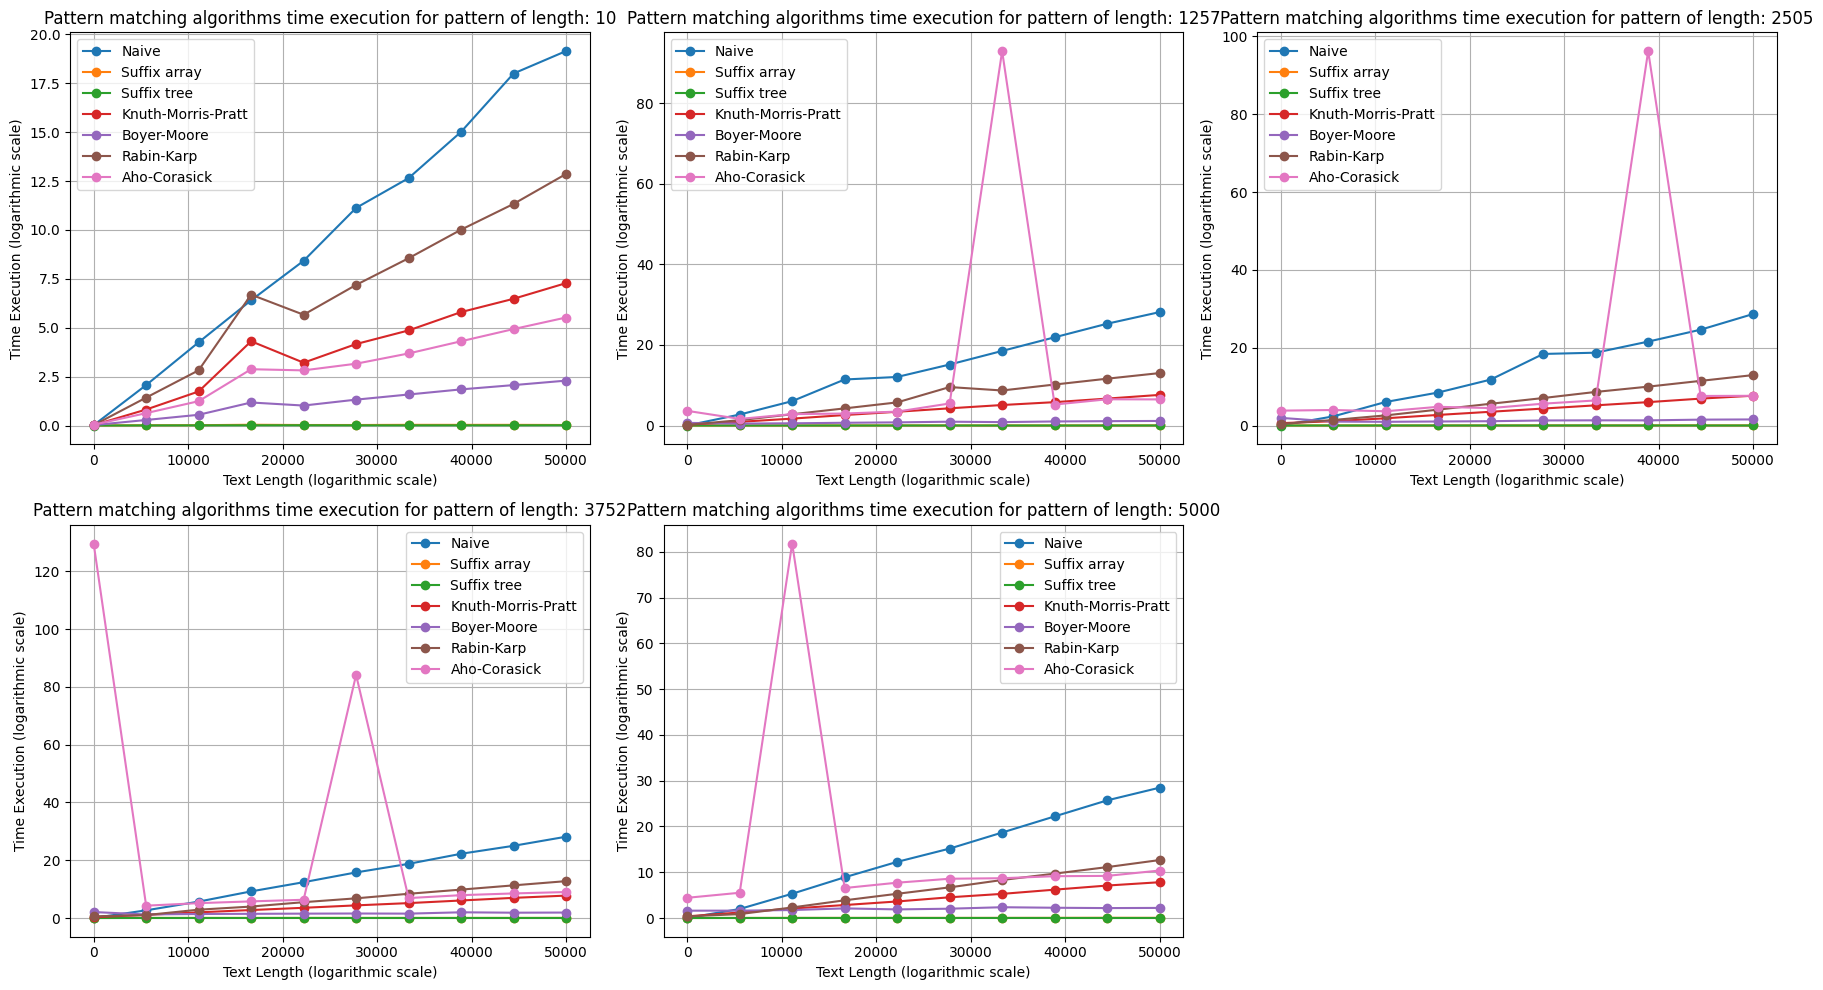

In [24]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage vs text length

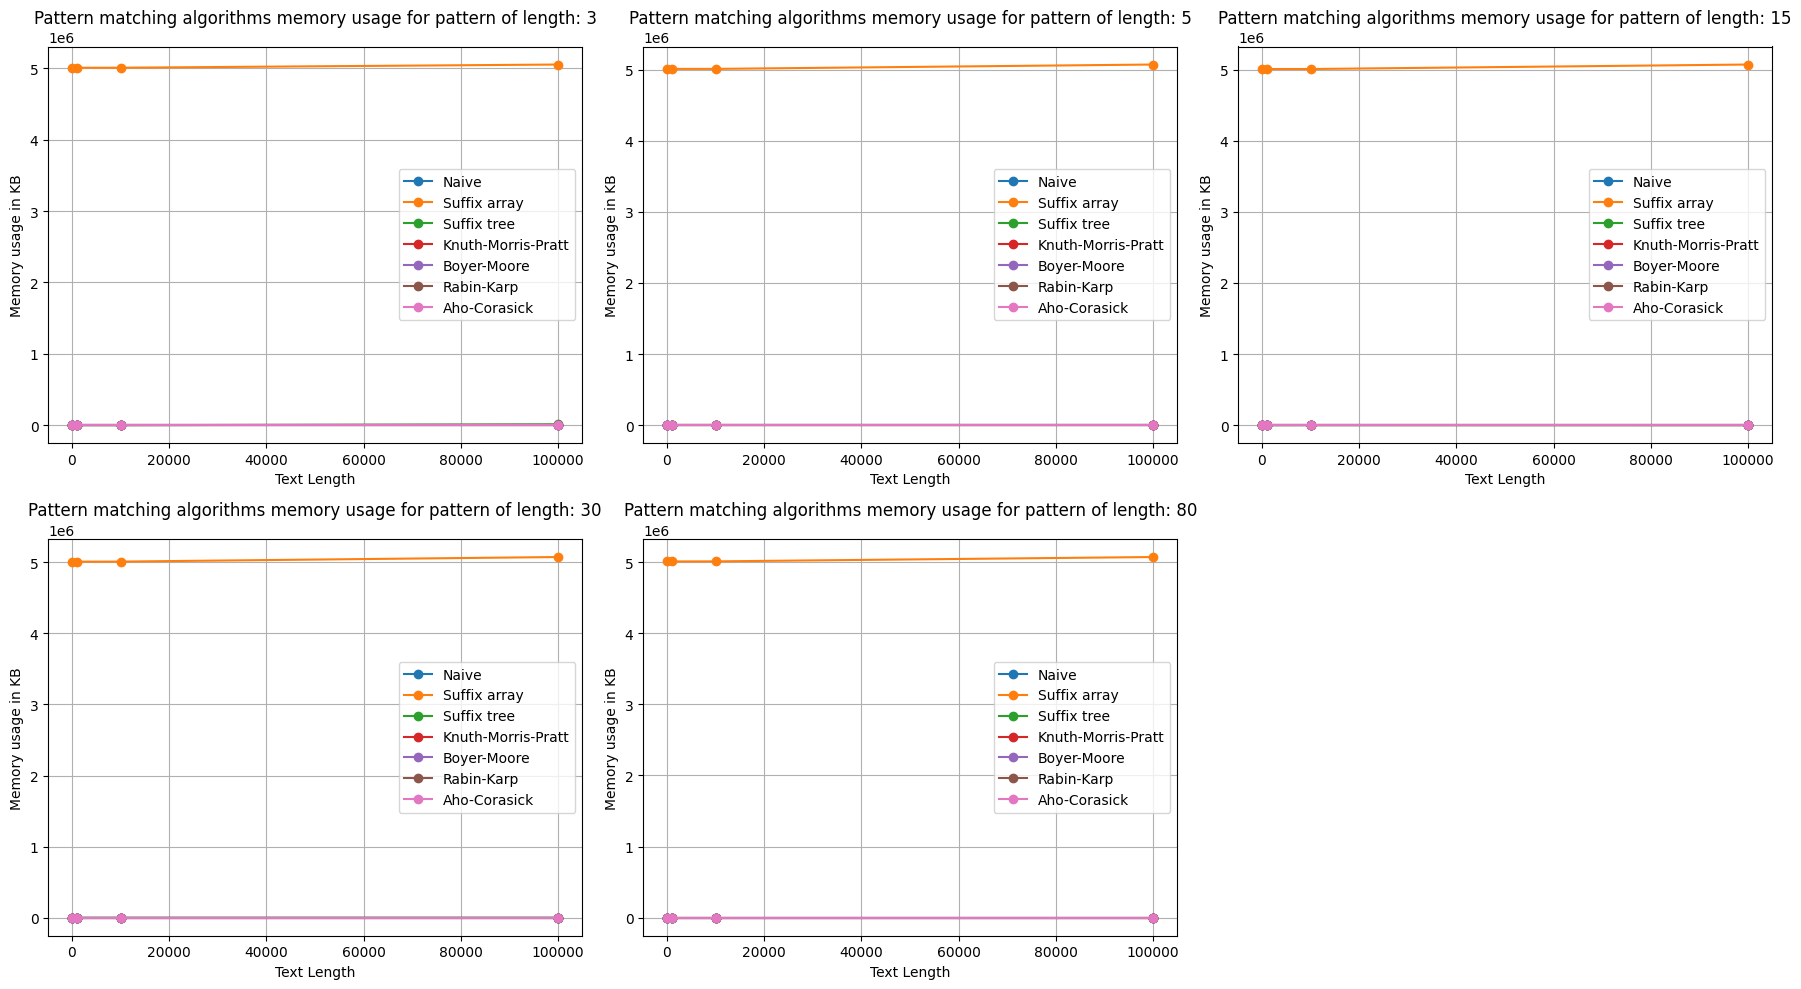

In [25]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Memory usage'], marker='o', label=algo)
            
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons vs text length

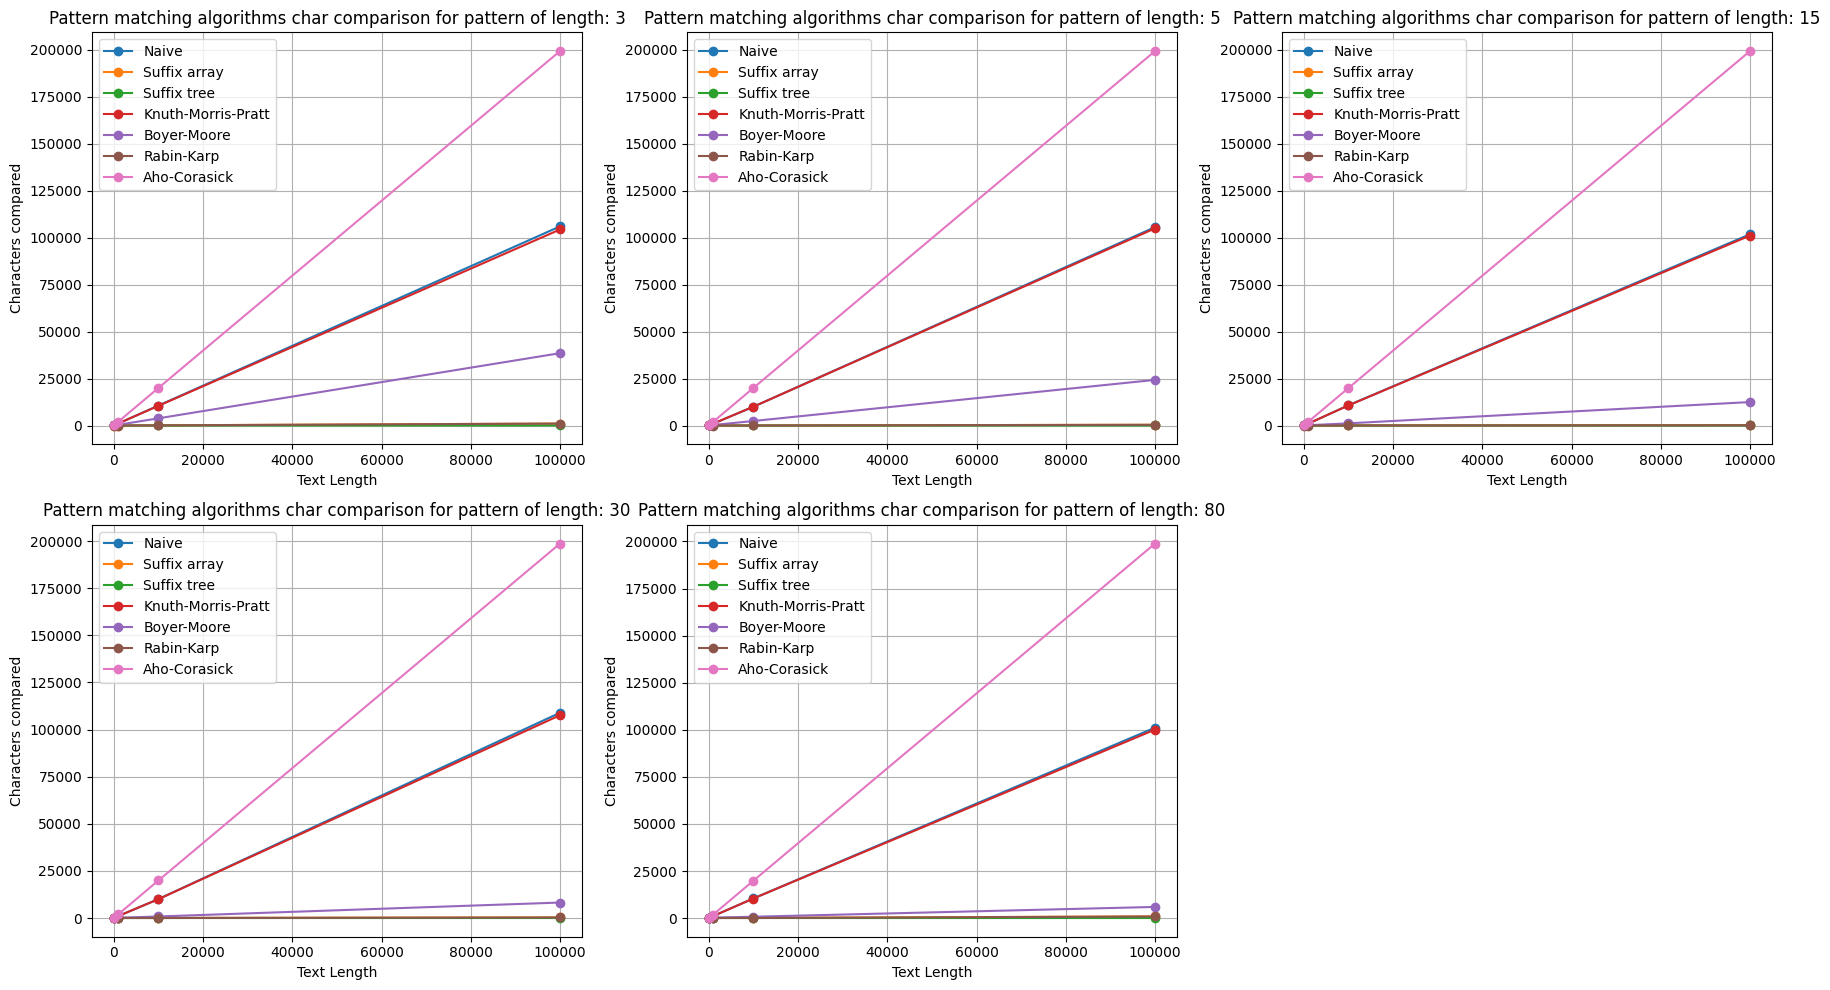

In [26]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker ='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Time execution vs pattern length

In [27]:
dtime = dict()
sizes_p = np.linspace(10,5e3,10, dtype=int)

text = randtext(100000)
for size_p in sizes_p:
    pattern = randtext(size_p)
    result = compare_pattern_matching_algorithms(text, pattern)
    for algorithm in result.keys():
        dtime[(algorithm, size_p)] = result[algorithm]["execution_time_ms"]

In [28]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Pattern Length']
df_time.unstack()

Pattern Length,10,564,1118,1673,2227,2782,3336,3891,4445,5000
Algorithm,,,,,,,,,,
Aho-Corasick,11.117220,11.506796,13.004541,12.291193,13.223648,13.767958,154.986858,15.225887,15.126705,16.153097
Boyer-Moore,4.583836,1.797199,1.554489,2.053499,1.975060,2.263069,2.720356,2.701998,3.215313,3.180981
Knuth-Morris-Pratt,14.551640,15.007973,14.892340,14.940977,14.938593,15.070438,15.236139,15.158415,16.038656,15.204191
Naive,40.685177,48.651695,56.340933,59.189796,62.182188,61.004400,60.179472,59.898376,62.049627,61.851025
Rabin-Karp,25.618315,26.160717,25.539160,25.388718,25.378227,25.383949,25.599480,25.316954,25.239706,25.276184
Suffix array,0.042677,0.039101,0.031948,0.033617,0.032902,0.031710,0.037432,0.032425,0.045300,0.032902
Suffix tree,0.013828,0.013590,0.013113,0.012636,0.011683,0.027895,0.012398,0.012398,0.013828,0.011444


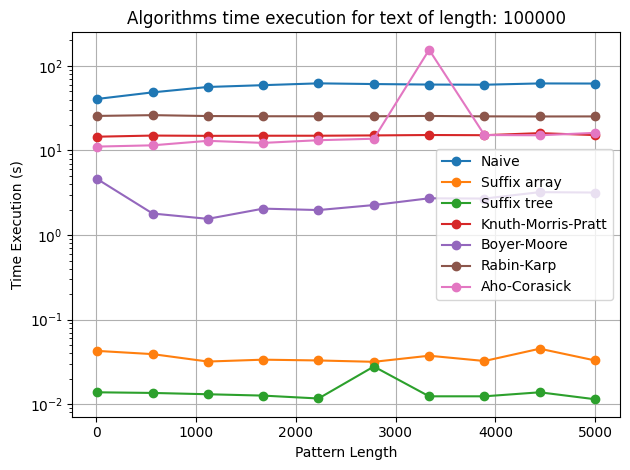

In [29]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

ax = plt.gca()
    
for algo in algorithms:
    subset = df_time_reset[(df_time_reset['Algorithm'] == algo)]
    plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)

plt.xlabel('Pattern Length')
plt.ylabel('Time Execution (s)')
plt.title(f'Algorithms time execution for text of length: 100000')
# plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions
Naive algorithm takes more time to execute for longer texts, for smaller texts may work faster than complex algorithms like Aho-Corasick. In general suffix structures show quicker pattern finding thanks to preprocessing of these structures, however suffix array seems to use more memory during searching. Algorithms such as Boyer-Moore, Knuth-Morris-Pratt and Rabin-Karp seems to work similarly in terms of time execution for same text and different patterns with different lengths.

In terms of finding multiple patterns in given text Aho-Corasick is suited for this task.
In terms of simplicity, one can use naive approach.
When working with larger texts with thousands of characters, the best would be constructing suffix tree and then using it to find patterns. Preprocessing is done in linear time when using complex Ukkonen algorithm, but when that is done, pattern finding seems to work the fastest among other algorithms.









.